# Cantor dust

In [1]:
from itertools import product

import numpy as np
import sympy as sy

import src

In [2]:
def cantor_dust(
    factor: sy.Expr, fix_points_1d: list[sy.Expr], space_dim: int
) -> src.SelfAffineSet:
    """Return the cantor dust."""

    ifs = [
        src.contractive_similarity(factor, sy.eye(space_dim), sy.Matrix(p))
        for p in product(*[fix_points_1d for _ in range(space_dim)])
    ]

    return src.SelfAffineSet(ifs, src.uniform_measure(len(ifs)), space_dim)

In [3]:
r = sy.Rational(1, 3)
c = [-1, 1]

attractor = cantor_dust(r, c, 2)

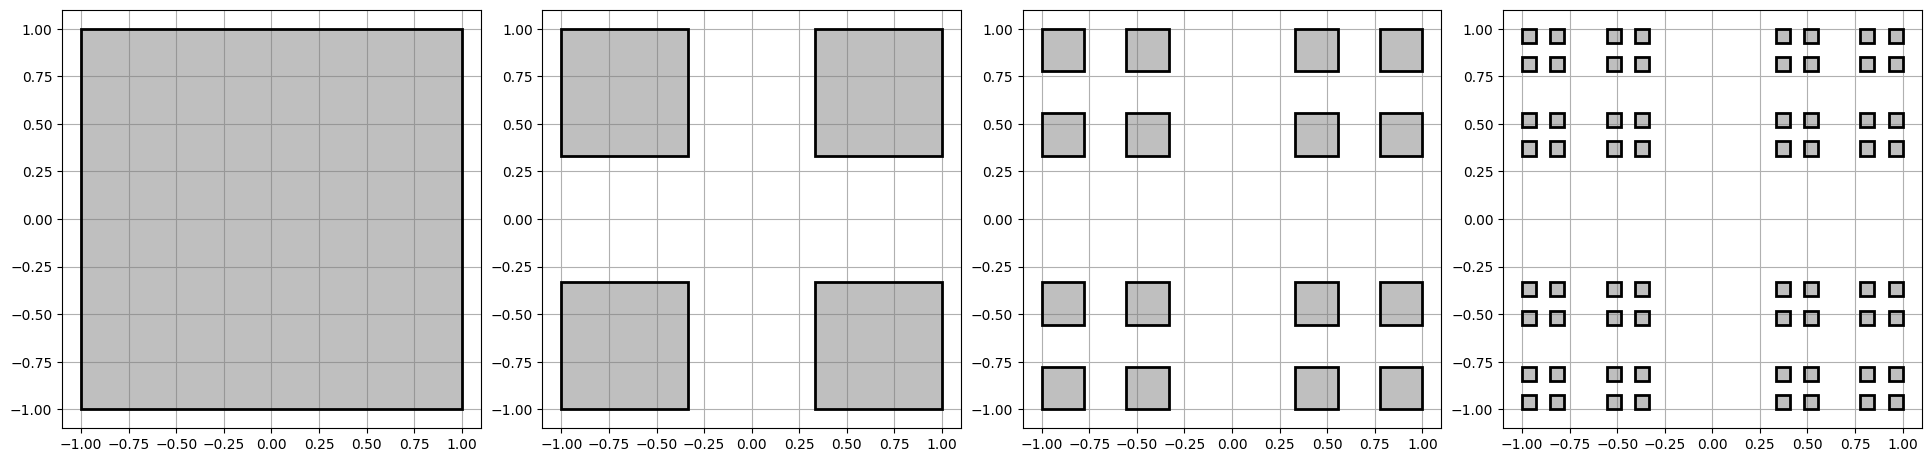

In [4]:
src.render_pre_attractor(attractor, np.array([[-1, 1, 1, -1], [-1, -1, 1, 1]]), 3)

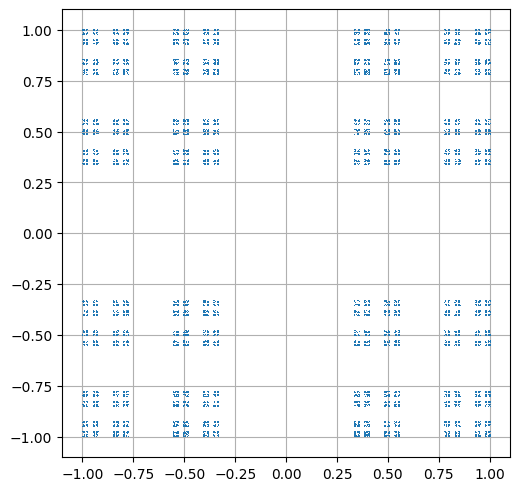

In [5]:
src.render_chaos_game(attractor, 10_000)

In [6]:
tot_deg_max = 4

values = src.compute_polynomial_integral(attractor, tot_deg_max)

src.display_values(values, attractor.space_dim, variables=sy.symbols("x y", real=True))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
# src.export_to_file(values, attractor, "d2-cantor-dust")